In [1]:
import numpy as np
from dgamod import *
import cmath as cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd
import os
mpl.rcParams.update({'font.size': 12})
plt.rcParams['axes.axisbelow'] = True
%matplotlib widget
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrkmyc')

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["b", "g", "r", 'k','y' , 'm','tab:orange', 'tab:cyan', 'tab:brown', 'slategrey', 'deeppink' ]) 

In [2]:
path = 'resultados/'

In [3]:
def compare_mean(dataframes, title = False, attribute = 'fitness', labels = False, figsize = [12,5], save = False,logscale = False):
    
    axs = plt.figure(figsize=figsize)

    if not title:
        title = 'Mean ' + attribute
    
    for i in range(len(dataframes)):
        dataframe = dataframes[i]
        
        if labels:
            label = labels[i]

        grouped_df = dataframe.groupby('dimension')
        mean = grouped_df[attribute].mean()
        std = grouped_df[attribute].std()
        min_value = grouped_df[attribute].min()
        max_value = grouped_df[attribute].max()

        stats = pd.DataFrame({'mean': mean, 'std': std, 'min': min_value,
                            'max': max_value})

        stats = stats.reset_index()

        plt.errorbar(stats['dimension'],stats['mean'], yerr=stats['std'],fmt='o',label = label,capsize=4, zorder=-2)
    plt.grid(True)
    plt.legend()
    plt.xlabel('N')
    plt.ylabel(attribute)
    plt.title(title)
    plt.yscale(logscale)

    if save:
        plt.savefig(save + 'mean' +attribute + '.png')
    return True

def compare_maxmin(dataframes, maxmin = 'max',title = False, attribute = 'fitness', labels = False, figsize = [12,5], save = False):
    
    axs = plt.figure(figsize=figsize)

    if not title:
        title = 'Mean' + attribute
    
    for i in range(len(dataframes)):
        dataframe = dataframes[i]
        
        if labels:
            label = labels[i]

        grouped_df = dataframe.groupby('dimension')
        mean = grouped_df[attribute].mean()
        std = grouped_df[attribute].std()
        min_value = grouped_df[attribute].min()
        max_value = grouped_df[attribute].max()

        stats = pd.DataFrame({'mean': mean, 'std': std, 'min': min_value,
                            'max': max_value})

        stats = stats.reset_index()
        if maxmin == 'max':
            plt.plot(stats['dimension'],stats['max'], 'o-',label = label)
        if maxmin == 'min':
            plt.plot(stats['dimension'],stats['min'], 'o-',label = label)

    plt.grid(True)
    plt.legend()
    plt.xlabel('N')
    plt.ylabel(attribute)
    plt.title(title)

    if save:
        plt.savefig(save + maxmin +attribute + '.png')

    return True

In [4]:
# -------------------------------------------------
# accion por sitio, localizada
# -------------------------------------------------

n_values = np.arange(10,20)

column_names = ['dimension', 'sample', 'fidelity', 'time', 'generations', 'cpu_time']
oaps_loc = pd.DataFrame(columns=column_names)

for n in n_values:
    file = path + 'one_action_per_site/n{}_one_action_per_site/nvsmaxfid.dat'.format(n)
    df = pd.read_csv(file, delimiter = ' ', names = column_names)
    oaps_loc = pd.concat([oaps_loc,df])


# -------------------------------------------------
# accion por sitio, acumulativa
# -------------------------------------------------

n_values = np.arange(10,20)

column_names = ['dimension', 'sample', 'fidelity', 'time', 'generations', 'cpu_time']
oaps_acc = pd.DataFrame(columns=column_names)

for n in n_values:
    file = path + 'one_action_per_site_acc/n{}_one_action_per_site_acc/nvsmaxfid.dat'.format(n)
    df = pd.read_csv(file, delimiter = ' ', names = column_names)
    oaps_acc = pd.concat([oaps_acc,df])


# -------------------------------------------------
# original, acumulativa
# -------------------------------------------------

n_values = np.arange(10,20)

column_names = ['dimension', 'sample', 'fidelity', 'time', 'generations', 'cpu_time']
og_acc = pd.DataFrame(columns=column_names)

for n in n_values:
    file =  '/home/sofi/Documents/resultados_dynga/n{}_og/nvsmaxfid.dat'.format(n)
    df = pd.read_csv(file, delimiter = ' ', names = column_names)
    og_acc = pd.concat([og_acc,df])

# -------------------------------------------------
# original, localizada
# -------------------------------------------------

n_values = np.arange(10,20)

column_names = ['dimension', 'sample', 'fidelity', 'time', 'generations', 'cpu_time']
og_loc = pd.DataFrame(columns=column_names)

for n in n_values:
    file =path + 'original_localizada/n{}_lb_v11/nvsmaxfid.dat'.format(n)
    df = pd.read_csv(file, delimiter = ' ', names = column_names)
    og_loc = pd.concat([og_loc,df])

/tmp/ipykernel_3120/1745761511.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  oaps_loc = pd.concat([oaps_loc,df])
/tmp/ipykernel_3120/1745761511.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  oaps_acc = pd.concat([oaps_acc,df])
/tmp/ipykernel_3120/1745761511.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the 

ValueError: False is not a valid value for scale; supported values are 'linear', 'log', 'symlog', 'asinh', 'logit', 'function', 'functionlog'

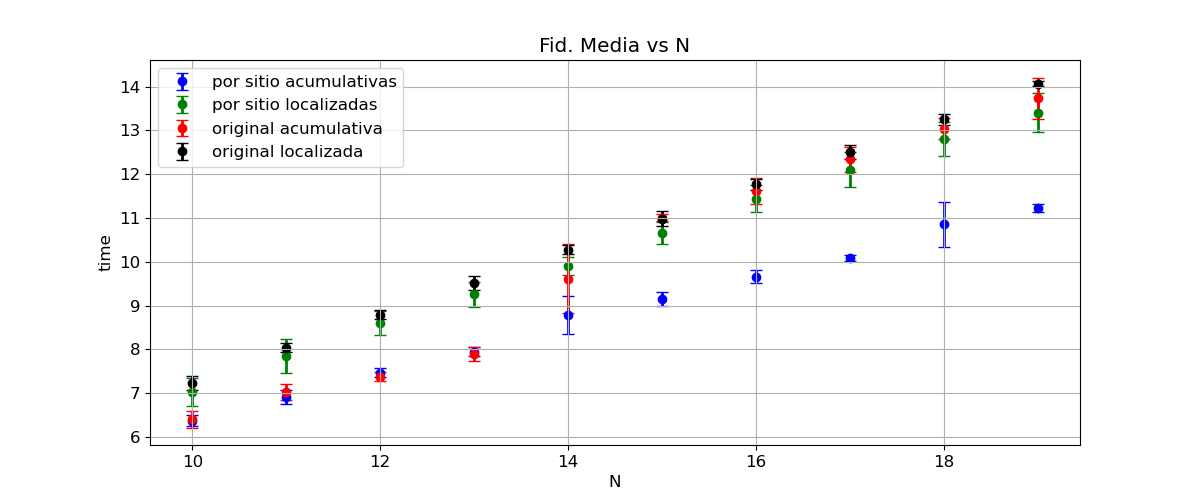

In [5]:

compare_mean([oaps_acc,oaps_loc, og_acc,og_loc],title= 'Fid. Media vs N', attribute= 'time',labels= ['por sitio acumulativas', 'por sitio localizadas', 'original acumulativa', 'original localizada'])
compare_maxmin([oaps_acc,oaps_loc, og_acc,og_loc],title= 'Fid. Maxima vs N', attribute= 'time',labels=['por sitio acumulativas', 'por sitio localizadas', 'original acumulativa', 'original localizada'])


#plt.plot(data['dimension'],3*data['dimension'])

ValueError: False is not a valid value for scale; supported values are 'linear', 'log', 'symlog', 'asinh', 'logit', 'function', 'functionlog'

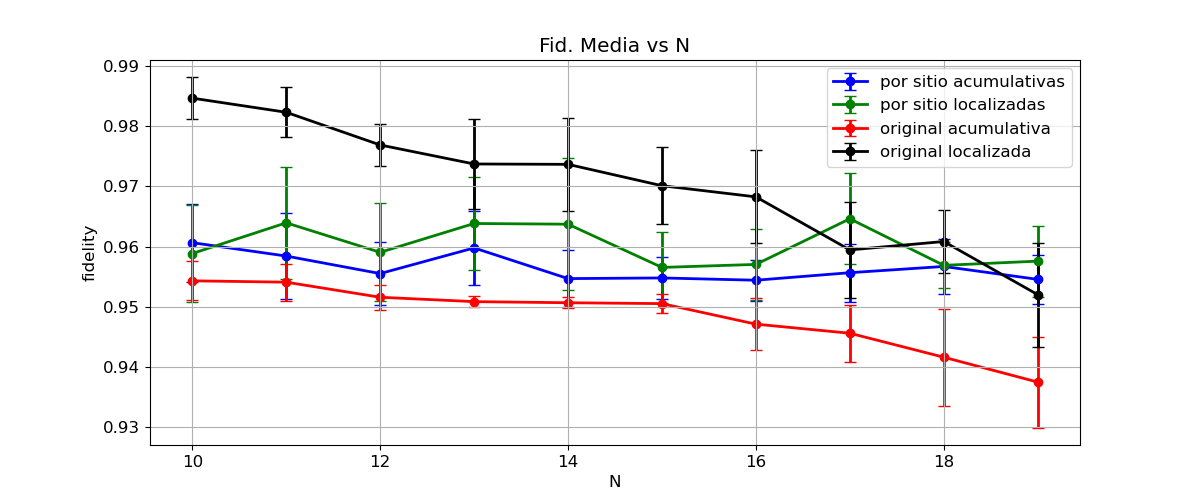

In [ ]:

compare_mean([oaps_acc,oaps_loc, og_acc,og_loc],title= 'Fid. Media vs N', attribute= 'fidelity',labels= ['por sitio acumulativas', 'por sitio localizadas', 'original acumulativa', 'original localizada'])
compare_maxmin([oaps_acc,oaps_loc, og_acc,og_loc],title= 'Fid. Maxima vs N', attribute= 'fidelity',labels=['por sitio acumulativas', 'por sitio localizadas', 'original acumulativa', 'original localizada'])


#plt.plot(data['dimension'],3*data['dimension'])

In [ ]:

compare_mean([original_version_ht,no_acc_original,lb_df],title= 'Fid. Media vs N', attribute= 'fidelity',labels=['$f_1$: no acumulativa', '$f_2$: acumulativa', '$f_3$: localizacion'])
compare_maxmin([original_version_ht,no_acc_original,lb_df],title= 'Fid. Maxima vs N', attribute= 'fidelity',labels=['$f_1$: no acumulativa', '$f_2$: acumulativa', '$f_3$: localizacion'])


#plt.plot(data['dimension'],3*data['dimension'])

NameError: name 'original_version_ht' is not defined

In [ ]:

compare_mean([lb_df,lb_v1],title= 'Fid. Media vs N', attribute= 'fidelity',labels=['v=1.1 * QSL', 'v=QSL'])
compare_maxmin([lb_df,lb_v1],title= 'Fid. Maxima vs N', attribute= 'fidelity',labels=['v=1.1 * QSL', 'v=QSL'])


#plt.plot(data['dimension'],3*data['dimension'])

NameError: name 'lb_df' is not defined

In [ ]:

compare_mean([original_version_ht,no_acc_original,lb_df],title= 'Tiempo medio de transmisión  vs N', attribute= 'time',labels=['$f_1$: no acumulativa', '$f_2$: acumulativa', '$f_3$: localizacion'])

#plt.plot(data['dimension'],3*data['dimension'])

NameError: name 'original_version_ht' is not defined

In [ ]:

compare_mean([original_version,original_version_ht, new_actions,new_actions_ht,no_acc_original,no_acc_new_actions],title= 'Tiempo medio de transmisión  vs N', attribute= 'time',labels=['Original .95','Original .99', 'Nuevas acciones .95',  'Nuevas acciones .99', 'No acumulativa original', 'No acumulativa nuevas acciones'])

#plt.plot(data['dimension'],3*data['dimension'])

NameError: name 'original_version' is not defined

NameError: name 'original_version' is not defined

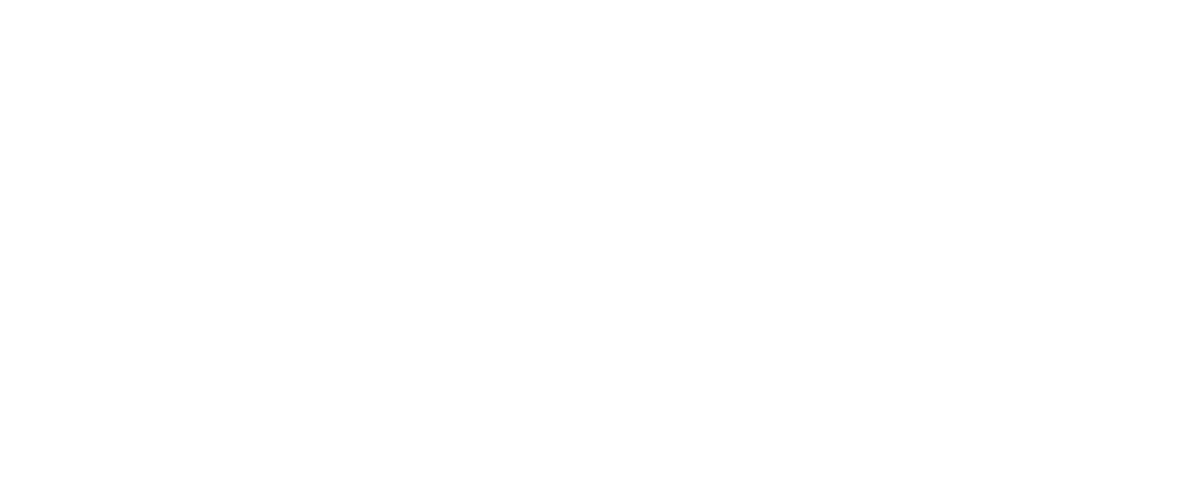

In [ ]:
def get_corresponding_value(group):
    return group.loc[group['fidelity'].idxmax(), 'time']

dims = np.arange(6,20)

axs = plt.figure(figsize=[12,5])

grouped_df = original_version.groupby('dimension')
result = grouped_df.apply(get_corresponding_value)
normalized_og_time = (result-dims/2)/(dims-1)
plt.plot(dims, normalized_og_time,'-v', label = 'original .95')


grouped_df = original_version_ht.groupby('dimension')
result = grouped_df.apply(get_corresponding_value)
normalized_og_ht_time = (result-dims/2)/(dims-1)
plt.plot(dims, normalized_og_ht_time,'-v', label = 'original .99')


grouped_df = new_actions.groupby('dimension')
result = grouped_df.apply(get_corresponding_value)
normalized_na_time = (result-dims/2)/(dims-1)
plt.plot(dims, normalized_na_time,'-v', label = 'nuevas acciones .95')


grouped_df = new_actions_ht.groupby('dimension')
result = grouped_df.apply(get_corresponding_value)
normalized_na_ht_time = (result-dims/2)/(dims-1)
plt.plot(dims, normalized_na_ht_time,'-v', label = 'nuevas acciones .99')

grouped_df = no_acc_original.groupby('dimension')
result = grouped_df.apply(get_corresponding_value)
normalized_nacc_og = (result-dims/2)/(dims-1)
plt.plot(dims, normalized_nacc_og,'-v', label = 'no acumulativa originales .99')


grouped_df = no_acc_new_actions.groupby('dimension')
result = grouped_df.apply(get_corresponding_value)
normalized_nacc_na = (result-dims/2)/(dims-1)
plt.plot(dims, normalized_nacc_na,'-v', label = 'no acumulativa nuevas acciones .99')

plt.ylabel('(time max. fid - QSL)/(N-1) ', fontsize = 15)
plt.xlabel('N', fontsize = 15)

plt.legend()

NameError: name 'original_version_ht' is not defined

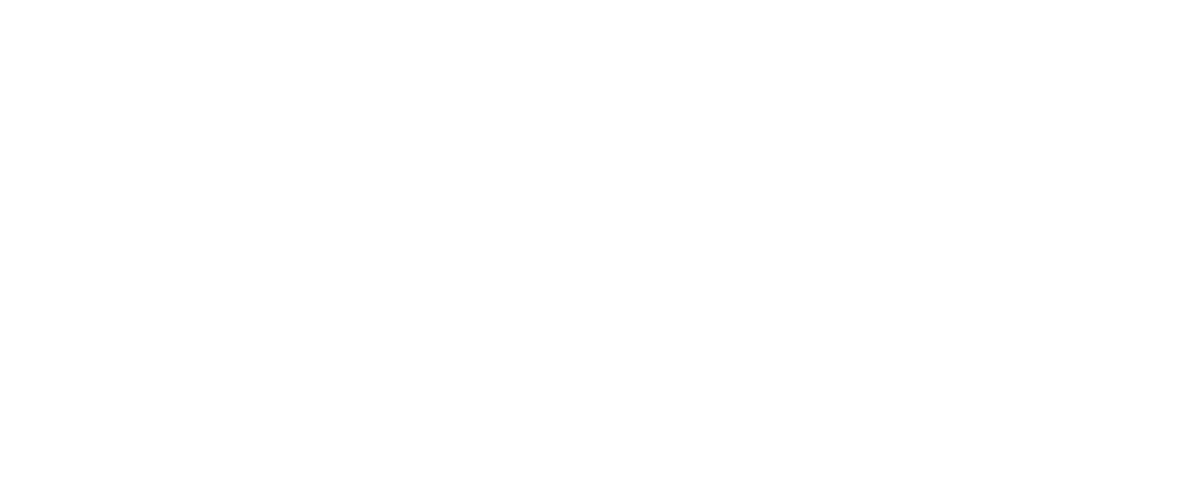

In [ ]:
def get_corresponding_value(group):
    return group.loc[group['fidelity'].idxmax(), 'time']

dims = np.arange(6,20)

axs = plt.figure(figsize=[12,5])

dataframes = [original_version_ht,no_acc_original,lb_df]
labels = ['$f_1$: no acumulativa', '$f_2$: acumulativa', '$f_3$: localizacion']
markers = ['-v','-o','-s']

for i in range(len(dataframes)):
    grouped_df = dataframes[i].groupby('dimension')
    result = grouped_df.apply(get_corresponding_value)
    normalized_og_time = (result-dims/2)/(dims-1)
    plt.plot(dims, normalized_og_time, markers[i], label = labels[i]) 



plt.ylabel('($t_{max}$ - $QSL$)$/(N-1)$ ', fontsize = 15)
plt.xlabel('N', fontsize = 15)

plt.legend()

In [ ]:
def compare_mean(dataframes, title = False, attribute = 'fitness', labels = False, figsize = [12,5], save = False,logscale = False):
    
    axs = plt.figure(figsize=figsize)

    if not title:
        title = 'Mean ' + attribute
    
    for i in range(len(dataframes)):
        dataframe = dataframes[i]
        
        if labels:
            label = labels[i]

        grouped_df = dataframe.groupby('dimension')
        mean = grouped_df[attribute].mean()
        std = grouped_df[attribute].std()
        min_value = grouped_df[attribute].min()
        max_value = grouped_df[attribute].max()

        stats = pd.DataFrame({'mean': mean, 'std': std, 'min': min_value,
                            'max': max_value})

        stats = stats.reset_index()

        plt.errorbar(stats['dimension'],stats['mean'], yerr=stats['std'],fmt='o',label = label,capsize=4, zorder=-2)
    plt.grid(True)
    plt.legend()
    plt.xlabel('N')
    plt.ylabel(attribute)
    plt.title(title)
    plt.yscale(logscale)

    if save:
        plt.savefig(save + 'mean' +attribute + '.png')
    return True


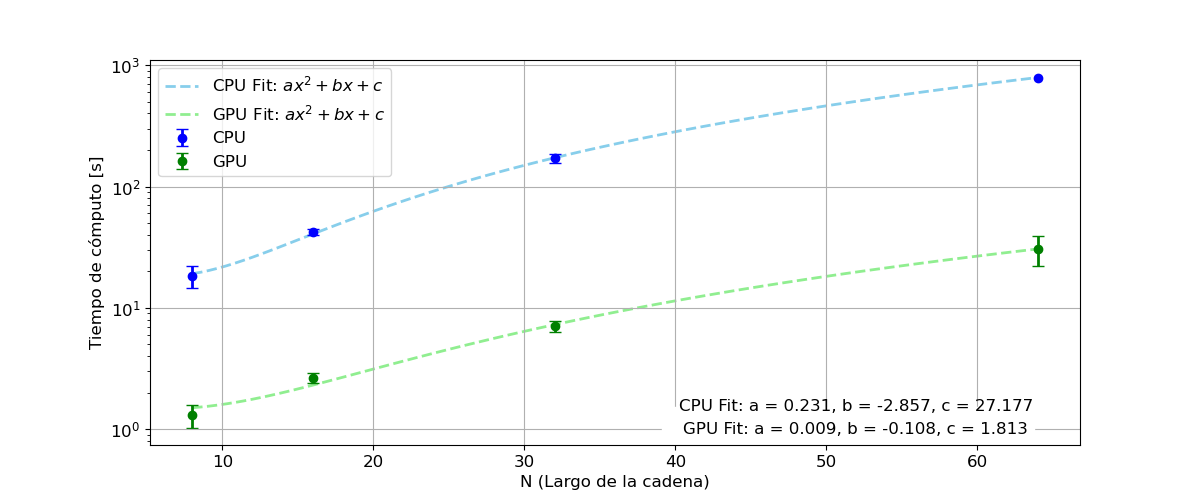

In [ ]:
from numpy.polynomial.polynomial import Polynomial

df = pd.read_csv('nvsmaxfid.dat', delimiter = ' ', names = column_names)
dfgpu = pd.read_csv('nvsmaxfid_gpu_jupiter.dat', delimiter = ' ', names = column_names)

compare_mean([df,dfgpu],title= ' ', attribute= 'cpu_time',labels=['CPU', 'GPU'],logscale='log')
# Fit a quadratic curve to the mean cpu_time for df and df_gpu
# Group by dimension and calculate mean cpu_time
mean_cpu_time_df = df.groupby('dimension')['cpu_time'].mean()
mean_cpu_time_dfgpu = dfgpu.groupby('dimension')['cpu_time'].mean()

# Fit a quadratic polynomial
p_cpu = Polynomial.fit(mean_cpu_time_df.index, mean_cpu_time_df.values, 2)
p_gpu = Polynomial.fit(mean_cpu_time_dfgpu.index, mean_cpu_time_dfgpu.values, 2)

# Generate x values for plotting the fit
x_vals = np.linspace(min(df['dimension']), max(df['dimension']), 100)

# Plot the data and the fit
#plt.plot(mean_cpu_time_df.index, mean_cpu_time_df.values, 'o', label='CPU Mean CPU Time')
plt.plot(x_vals, p_cpu(x_vals), '--', label='CPU Fit: $ax^2 + bx + c$',zorder=-10,color='skyblue')
#plt.plot(mean_cpu_time_dfgpu.index, mean_cpu_time_dfgpu.values, 'o', label='GPU Mean CPU Time')
plt.plot(x_vals, p_gpu(x_vals), '--', label='GPU Fit: $ax^2 + bx + c$',zorder=-10,color='lightgreen')
plt.xlabel('N (Largo de la cadena)')
plt.ylabel('Tiempo de cómputo [s]')
plt.legend()
plt.yscale('log')
plt.grid(True)
# Print the coefficients of the quadratic polynomial for CPU and GPU
# Print the coefficients of the quadratic polynomial for CPU and GPU in a nice box with white background
plt.gca().add_patch(plt.Rectangle((0.55, -0.1), 0.4, 0.2, color='white', transform=plt.gca().transAxes))
plt.text(0.95, 0.08, "CPU Fit: a = {:.3f}, b = {:.3f}, c = {:.3f}".format(p_cpu.convert().coef[2], p_cpu.convert().coef[1], p_cpu.convert().coef[0]),
         horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes)
plt.text(0.95, 0.02, "GPU Fit: a = {:.3f}, b = {:.3f}, c = {:.3f} ".format(p_gpu.convert().coef[2], p_gpu.convert().coef[1], p_gpu.convert().coef[0]),
         horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes)

plt.show()


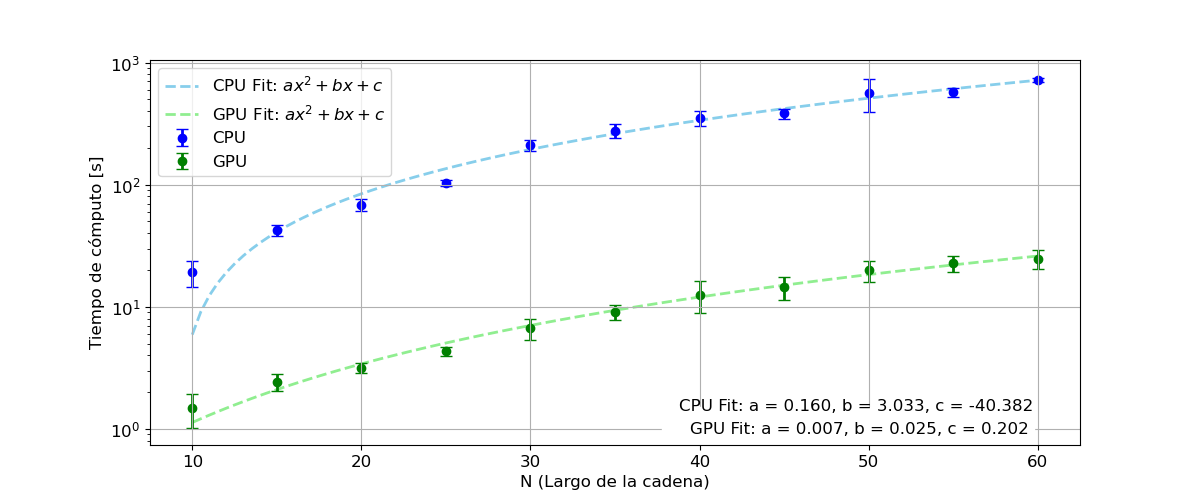

In [ ]:
from numpy.polynomial.polynomial import Polynomial

df = pd.read_csv('nvsmaxfid_og.dat', delimiter = ' ', names = column_names)
dfgpu = pd.read_csv('nvsmaxfid_jup_gpu.dat', delimiter = ' ', names = column_names)

compare_mean([df,dfgpu],title= ' ', attribute= 'cpu_time',labels=['CPU', 'GPU'],logscale='log')
# Fit a quadratic curve to the mean cpu_time for df and df_gpu
# Group by dimension and calculate mean cpu_time
mean_cpu_time_df = df.groupby('dimension')['cpu_time'].mean()
mean_cpu_time_dfgpu = dfgpu.groupby('dimension')['cpu_time'].mean()

# Fit a quadratic polynomial
p_cpu = Polynomial.fit(mean_cpu_time_df.index, mean_cpu_time_df.values, 2)
p_gpu = Polynomial.fit(mean_cpu_time_dfgpu.index, mean_cpu_time_dfgpu.values, 2)

# Generate x values for plotting the fit
x_vals = np.linspace(min(df['dimension']), max(df['dimension']), 100)

# Plot the data and the fit
#plt.plot(mean_cpu_time_df.index, mean_cpu_time_df.values, 'o', label='CPU Mean CPU Time')
plt.plot(x_vals, p_cpu(x_vals), '--', label='CPU Fit: $ax^2 + bx + c$',zorder=-10,color='skyblue')
#plt.plot(mean_cpu_time_dfgpu.index, mean_cpu_time_dfgpu.values, 'o', label='GPU Mean CPU Time')
plt.plot(x_vals, p_gpu(x_vals), '--', label='GPU Fit: $ax^2 + bx + c$',zorder=-10,color='lightgreen')
plt.xlabel('N (Largo de la cadena)')
plt.ylabel('Tiempo de cómputo [s]')
plt.legend()
plt.yscale('log')
plt.grid(True)
# Print the coefficients of the quadratic polynomial for CPU and GPU
# Print the coefficients of the quadratic polynomial for CPU and GPU in a nice box with white background
plt.gca().add_patch(plt.Rectangle((0.55, -0.1), 0.4, 0.2, color='white', transform=plt.gca().transAxes))
plt.text(0.95, 0.08, "CPU Fit: a = {:.3f}, b = {:.3f}, c = {:.3f}".format(p_cpu.convert().coef[2], p_cpu.convert().coef[1], p_cpu.convert().coef[0]),
         horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes)
plt.text(0.95, 0.02, "GPU Fit: a = {:.3f}, b = {:.3f}, c = {:.3f} ".format(p_gpu.convert().coef[2], p_gpu.convert().coef[1], p_gpu.convert().coef[0]),
         horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes)

plt.show()
